#MNIST Handwritten Digit Classification using Deep Learning

Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Data Collection

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape #training data

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape #training label

(60000,)

In [7]:
y_test.shape

(10000,)

Training data= 60000
Test data= 10000

Image dimension= 28x28
Grayscale Image

In [8]:
#print the 10th image
print(x_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

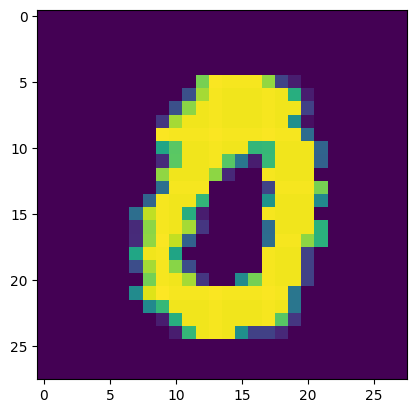

0


In [9]:
#display the image
plt.imshow(x_train[69])
plt.show()

print(y_train[69])

Image Labels

In [10]:
print(y_test.shape,y_train.shape)

(10000,) (60000,)


In [11]:
#Unique value in y_train
print(np.unique(y_train))

#Unique value in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this labels as such or we can apply one hot encoding

All the images have same dimensions in this dataseet. if not we have to resize all of them

In [12]:
#scaling values
x_train=x_train/255
x_test=x_test/255

In [13]:
#print the 10th image
print(x_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

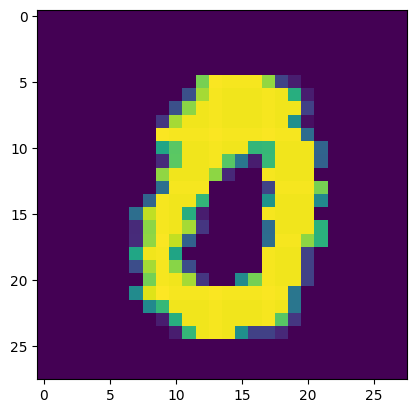

0


In [14]:
#display the image
plt.imshow(x_train[69])
plt.show()

print(y_train[69])

Building a neural network

In [15]:
# Setting up the layers of the neural network

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input shape is the size of image and since gray scale so no ",3"
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid') #output layers/number of classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [17]:
model.summary(

)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#training the neural network
model.fit(x_train,y_train,epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8299 - loss: 0.5938 - val_accuracy: 0.9352 - val_loss: 0.2129
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9482 - loss: 0.1725 - val_accuracy: 0.9507 - val_loss: 0.1593
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9633 - loss: 0.1216 - val_accuracy: 0.9575 - val_loss: 0.1376
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9726 - loss: 0.0950 - val_accuracy: 0.9600 - val_loss: 0.1321
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9770 - loss: 0.0757 - val_accuracy: 0.9613 - val_loss: 0.1303
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9815 - loss: 0.0617 - val_accuracy: 0.9648 - val_loss: 0.1244
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0502 - val_accuracy: 0.9662 - val_loss: 0.1244
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9884 - loss: 0.0410 -

Training data accuracy is : 99.03%
Validation Accuracy: 96.65%


In [19]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9648 - loss: 0.1320


Test Accuracy: 96.48%

In [20]:
print(accuracy,loss)

0.9684000015258789 0.12210943549871445


In [21]:
x_test.shape

(10000, 28, 28)

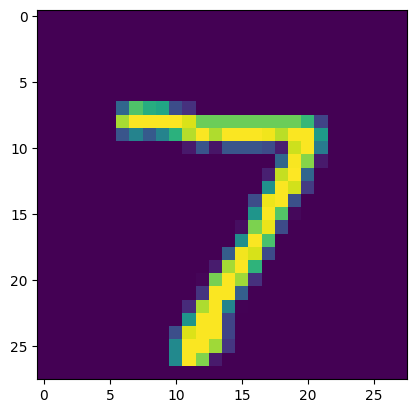

7


In [24]:
# first data of Test
plt.imshow(x_test[0])
plt.show()
print(y_test[0])

In [25]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
y_pred.shape

(10000, 10)

In [27]:
y_pred[0]

array([8.9192623e-03, 2.8794568e-03, 8.7040579e-01, 9.9889696e-01,
       3.6999771e-07, 2.6587716e-06, 4.3673858e-12, 9.9999988e-01,
       1.0987510e-03, 8.5164320e-01], dtype=float32)

model.predict() gives the prediction probability of each clas for thst data

In [31]:
#COnverting the pred prob to class label
label_for_first_image=np.argmax(y_pred[0])
label_for_first_image

np.int64(7)

In [35]:
#COnverting the pred prob to class label for all test data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test: Ground Truth
Y_test_labels: Predicted model

Confusion Matrix

In [36]:
conf_mat=confusion_matrix(y_test,y_pred_labels)

In [37]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    0,    3,    3,    8,    2,    3,    0],
       [   0, 1121,    3,    2,    0,    0,    4,    2,    3,    0],
       [   3,    0,  991,    9,    4,    1,    7,    8,    9,    0],
       [   0,    0,    7,  980,    0,    9,    1,    7,    4,    2],
       [   0,    0,    3,    1,  959,    0,    8,    1,    2,    8],
       [   3,    0,    1,    7,    0,  862,    9,    2,    5,    3],
       [   2,    2,    0,    1,    6,    7,  940,    0,    0,    0],
       [   2,    2,    7,    3,    4,    1,    1,  995,    1,   12],
       [   5,    0,    4,   13,    6,    7,    7,    7,  922,    3],
       [   2,    2,    1,   13,   16,    9,    1,    5,    6,  954]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted LAbels')

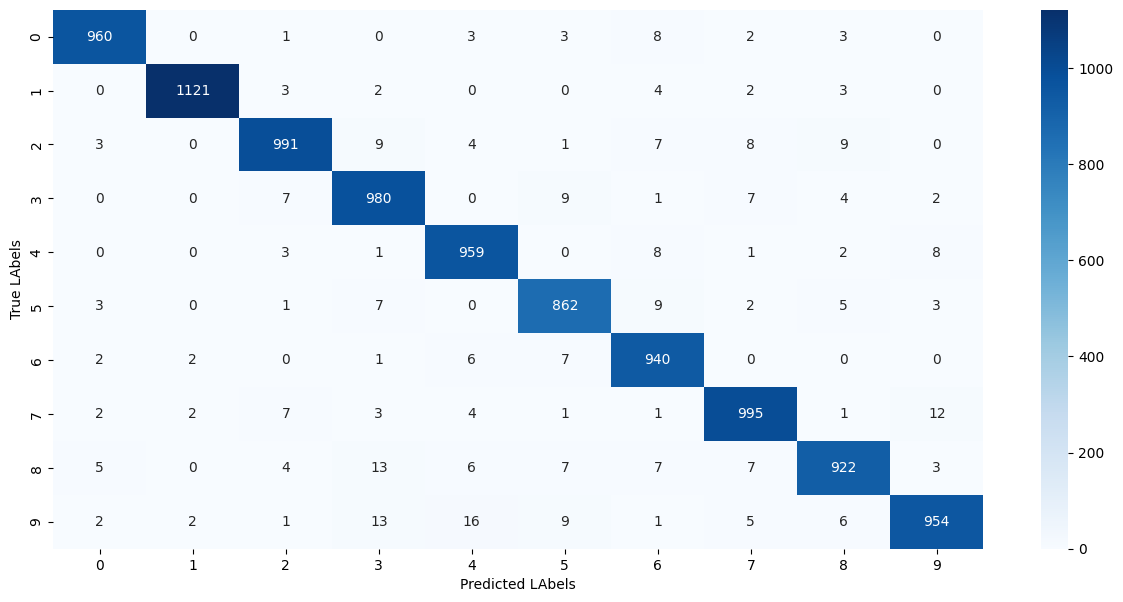

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap="Blues")
plt.ylabel('True LAbels')
plt.xlabel("Predicted LAbels")

Building a predictive System

In [39]:
input_image_path='/content/3.1.png'

input_image=cv2.imread(input_image_path)


In [40]:
type(input_image)

numpy.ndarray

In [43]:
print(input_image)

[[[ 83  83  83]
  [112 112 112]
  [195 195 195]
  ...
  [235 235 235]
  [235 235 235]
  [237 237 237]]

 [[ 53  53  53]
  [ 51  51  51]
  [ 46  46  46]
  ...
  [ 44  44  44]
  [ 44  44  44]
  [ 84  84  84]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  1   1   1]
  [  0   0   0]
  [ 52  52  52]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  2   2   2]
  [ 53  53  53]]

 [[  0   0   0]
  [  1   1   1]
  [  0   0   0]
  ...
  [  0   0   0]
  [  2   2   2]
  [ 54  54  54]]

 [[  1   1   1]
  [  3   3   3]
  [  2   2   2]
  ...
  [  1   1   1]
  [  3   3   3]
  [ 49  49  49]]]


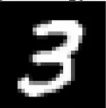

In [42]:
cv2_imshow(input_image)

In [44]:
input_image.shape

(108, 106, 3)

In [45]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [46]:
print(grayscale)

[[ 83 112 195 ... 235 235 237]
 [ 53  51  46 ...  44  44  84]
 [  2   2   2 ...   1   0  52]
 ...
 [  0   0   0 ...   0   2  53]
 [  0   1   0 ...   0   2  54]
 [  1   3   2 ...   1   3  49]]


In [47]:
grayscale.shape

(108, 106)

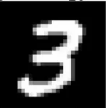

In [48]:
cv2_imshow(grayscale)

In [49]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [50]:
input_image_resize

array([[ 29,  26,  26,  25,  25,  25,  25,  25,  25,  25,  25,  25,  25,
         25,  25,  25,  25,  25,  29,  30,  28,  30,  27,  25,  25,  25,
         25,  25],
       [  1,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   1,   1,   1,   1,   1,   1,   1,   1,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  37,  44,
        112, 229, 231, 231, 231, 231, 227, 148,   1,   1,   1,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,  10,  51, 141, 219, 217,
        246, 253, 253, 253, 253, 253, 253, 239, 153,   9,   1,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,  42, 188, 253, 251, 251,
        253, 254, 254, 254, 254, 254, 254, 253, 254,  57,   1,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,  26, 123, 251, 250, 219,
        133, 134, 131, 131, 190, 251, 253, 254, 254,  57,   1,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   5,  22,  19,  14,
          0,   1,   1,   1,  26, 225, 253, 247, 170,   3,   1,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   1,   1,   1,  97, 242, 253, 243, 147,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
          1,   1,   6,  87, 191, 251, 253, 232,  18,   1,   1,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         11,  99, 209, 247, 250, 252, 249, 186,   9,   0,   1,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6,  44, 131, 193, 193,
        200, 251, 251, 250, 250, 232,  96,  22,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   9,  85, 227, 251, 253, 254,
        254, 254, 253, 253, 246, 168,   1,   0,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   9,  84, 224, 252, 254, 254,
        254, 254, 254, 253, 252, 245,  68,   1,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   1,   6,  36, 111,  46,  38,
         38,  38,  42, 141, 253, 244,  68,   1,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   1,   1,   1,   1,
          1,   1,   2,  13, 252, 244,  68,   1,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,
          1,   1,   5,  85, 251, 244,  68,   1,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   1,  22,  65,   5,   1,   1,   1,   1,
          0,   7, 105, 241, 251, 244,  68,   1,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,  14,  81, 199, 211,  21,   0,   1,   1,   2,
         27,  99, 240, 250, 252, 236,  62,   1,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,  49, 215, 253, 231, 143, 134, 135, 135, 142,
        207, 252, 252, 253, 180,  82,   1,   0,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,  48, 214, 253, 253, 253, 251, 253, 251, 252,
        252, 252, 225, 152,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,  12,  68, 184, 253, 253, 253, 253, 247, 214,
        202, 139,  43,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   2,  3

In [51]:
cv2_imshow(input_image_resize)

In [52]:
input_image_resize=input_image_resize/255

In [53]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [54]:
image_reshaped

array([[[0.11372549, 0.10196078, 0.10196078, 0.09803922, 0.09803922,
         0.09803922, 0.09803922, 0.09803922, 0.09803922, 0.09803922,
         0.09803922, 0.09803922, 0.09803922, 0.09803922, 0.09803922,
         0.09803922, 0.09803922, 0.09803922, 0.11372549, 0.11764706,
         0.10980392, 0.11764706, 0.10588235, 0.09803922, 0.09803922,
         0.09803922, 0.09803922, 0.09803922],
        [0.00392157, 0.00392157, 0.00392157, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [56]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
[[2.3338723e-06 7.7247394e-05 3.9879832e-02 1.0000000e+00 8.7200223e-13
  1.7414187e-04 1.7302714e-16 2.0101969e-04 5.3169560e-01 1.2234987e-01]]


In [57]:
input_pred_label=np.argmax(input_prediction)

In [58]:
input_pred_label

np.int64(3)

Prediction System

Path of image to be predicted: /content/5.1.png


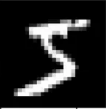

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The hand written digit is recognised as  5


In [60]:
input_image_path=input('Path of image to be predicted: ')

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print("The hand written digit is recognised as ",input_pred_label)